# LAB 06 - LinePlot


## 03 데이터 시각화 핵심 포인트



### #01.준비 작업
#### 1-1 라이브러리 참조

In [29]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
import numpy as np

#### 1-2 데이터 불러오기

In [30]:
origin = load_data('traffic_acc')
origin

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [31]:
#데이터 전처리
df=origin.drop('월',axis=1).groupby('년도').sum()
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


#### 1-3.그래프 초기화

In [32]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

### #02. 시각화 기본 코드
- 동일한 결과를 다양한 형태로 표현할 수 있음
- sb.lineplot(df['발생건수'])
- sb.lineplot(x=df.index,y=df['발생건수'])
- sb.lineplot(data=df,x=df.index,y='발생건수')

#### 표현 방식 1) df['발생건수']

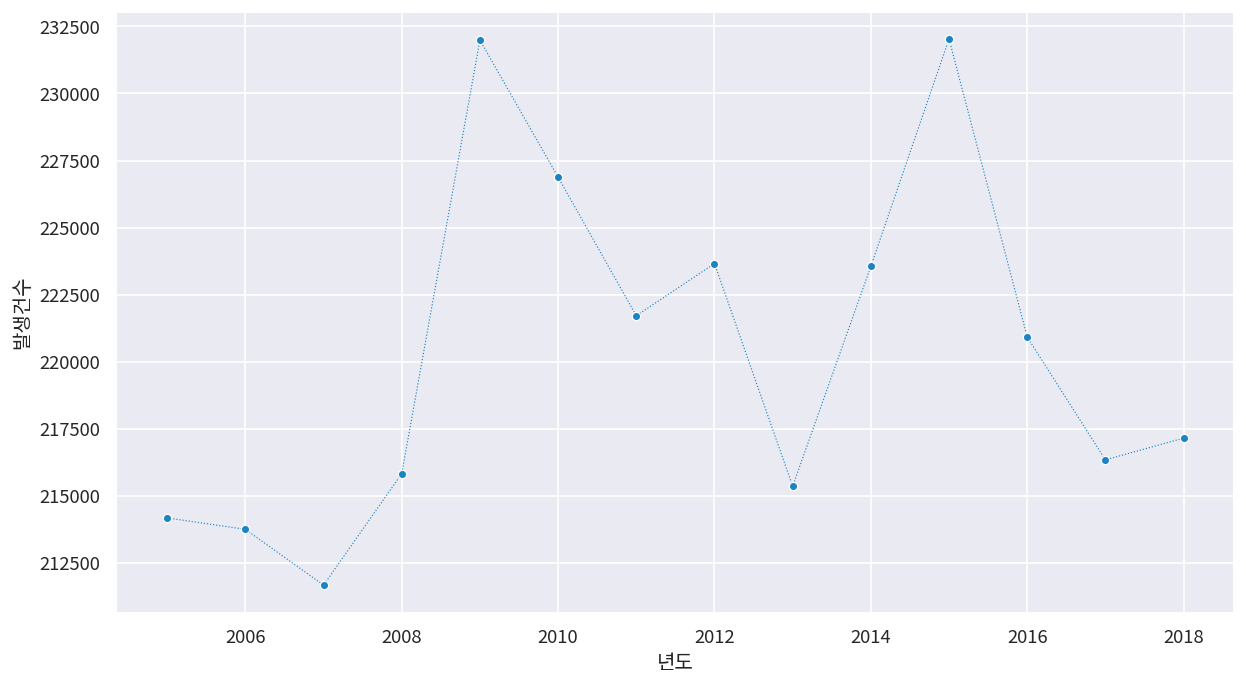

In [33]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(df['발생건수'],          
            color='#1D84C3', linewidth=0.7, linestyle=':',
            marker='o', markersize=5,
         )

# 3) 그래프 꾸미기
ax.grid(True)                # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()           # 여백 제거
plt.savefig('plot.png', dpi=my_dpi * 2)
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료


#### 표현 방식 2) x=df.index,y=df['발생건수']

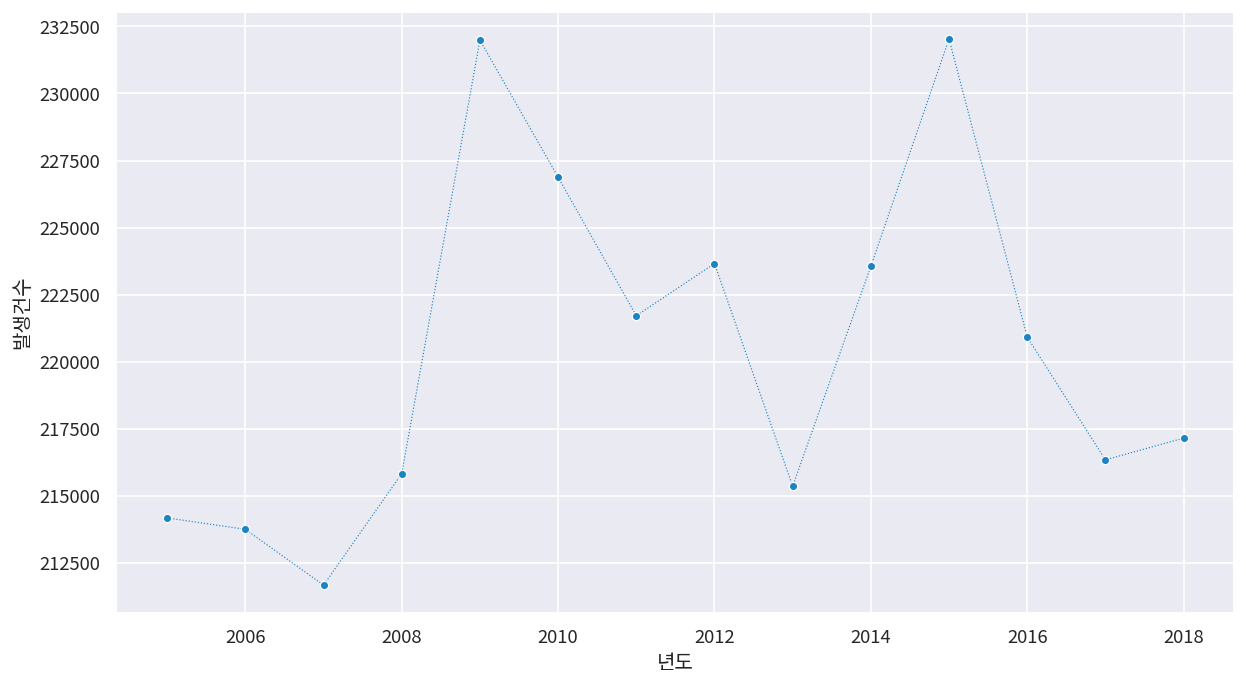

In [34]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(x=df.index,y=df['발생건수'],          
            color='#1D84C3', linewidth=0.7, linestyle=':',
            marker='o', markersize=5,
         )

# 3) 그래프 꾸미기
ax.grid(True)                # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()           # 여백 제거
plt.savefig('plot.png', dpi=my_dpi * 2)
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료


#### 표현 방식 3) sb.lineplot(data=df,x=df.index,y='발생건수')

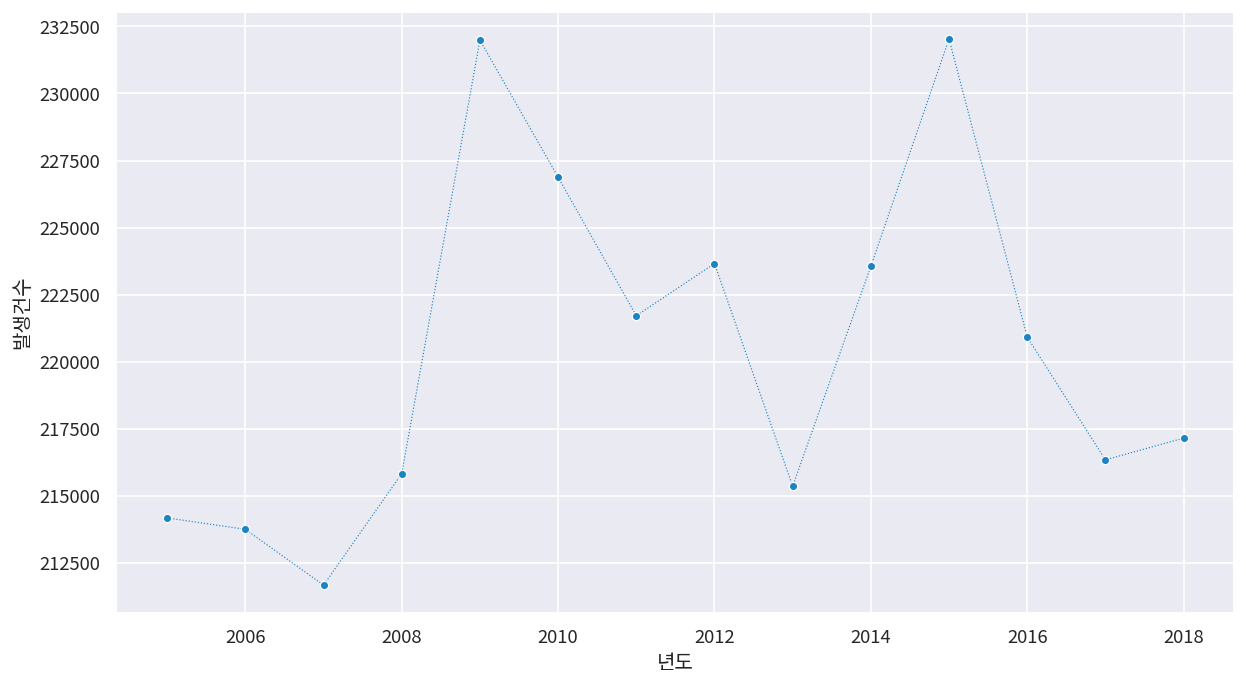

In [35]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(data=df,x=df.index,y='발생건수',          
            color='#1D84C3', linewidth=0.7, linestyle=':',
            marker='o', markersize=5,
         )

# 3) 그래프 꾸미기
ax.grid(True)                # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()           # 여백 제거
plt.savefig('plot.png', dpi=my_dpi * 2)
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료


### #03.다중 그래프
- 그래프 부분을 여러개로 작성하면 다중 그래프가 된다

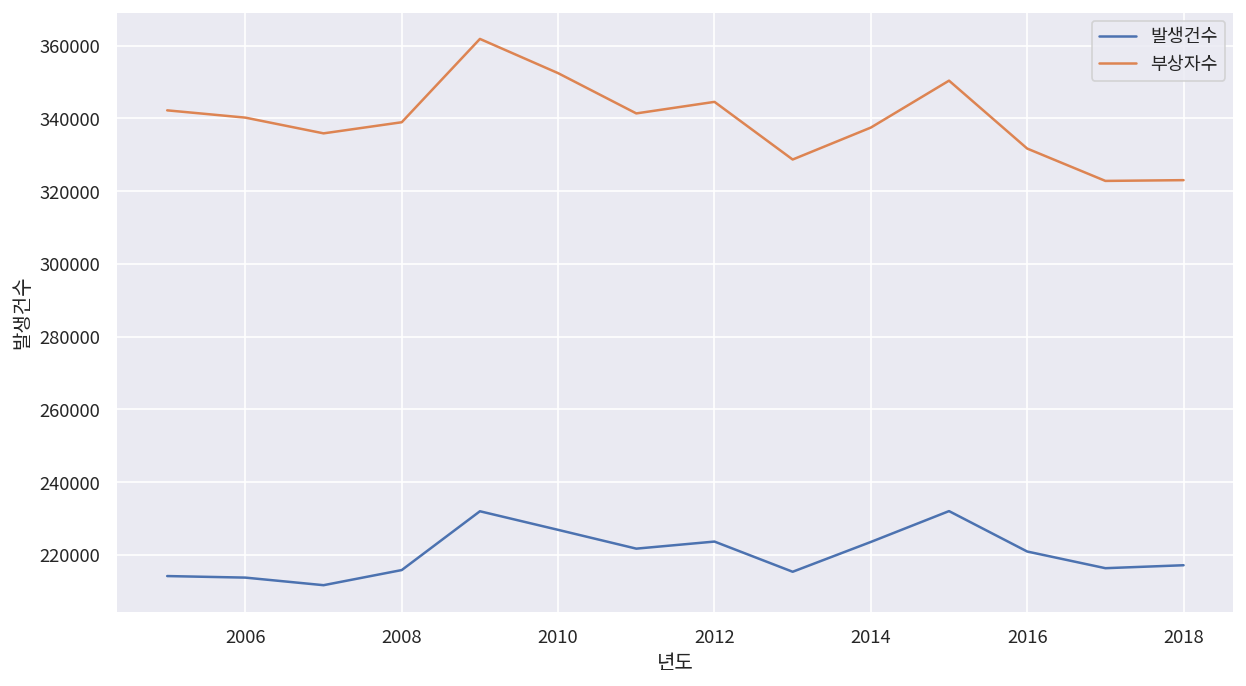

In [36]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(data=df,x=df.index,y='발생건수',          
              label = '발생건수'
         )

sb.lineplot(data=df,x=df.index,y='부상자수',          
           label = '부상자수'
         )

# 3) 그래프 꾸미기
ax.grid(True)                # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()           # 여백 제거
plt.savefig('plot.png', dpi=my_dpi * 2)
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료


### #04.hue 파라미터 이해하기

#### 4-1. 데이터 전처리 (melt)


In [37]:
#melt 를 적용할 경우 index 해제
df1 = df.reset_index()
df1

,년도,발생건수,사망자수,부상자수
0,2005,214171,6376,342233
1,2006,213745,6327,340229
2,2007,211662,6166,335906
3,2008,215822,5870,338962
4,2009,231990,5838,361875
5,2010,226878,5505,352458
6,2011,221711,5229,341391
7,2012,223656,5392,344565
8,2013,215354,5092,328711
9,2014,223552,4762,337497


In [40]:
#melt 함수로 시각화에 필요한 현태 만들기
df2 = df1.melt(id_vars='년도',value_vars=['발생건수','사망자수','부상자수'],var_name = '구분')
df2

,년도,구분,value
0,2005,발생건수,214171
1,2006,발생건수,213745
2,2007,발생건수,211662
3,2008,발생건수,215822
4,2009,발생건수,231990
5,2010,발생건수,226878
6,2011,발생건수,221711
7,2012,발생건수,223656
8,2013,발생건수,215354
9,2014,발생건수,223552


#### 4-2 hue 파라미터를 사용한 시각화

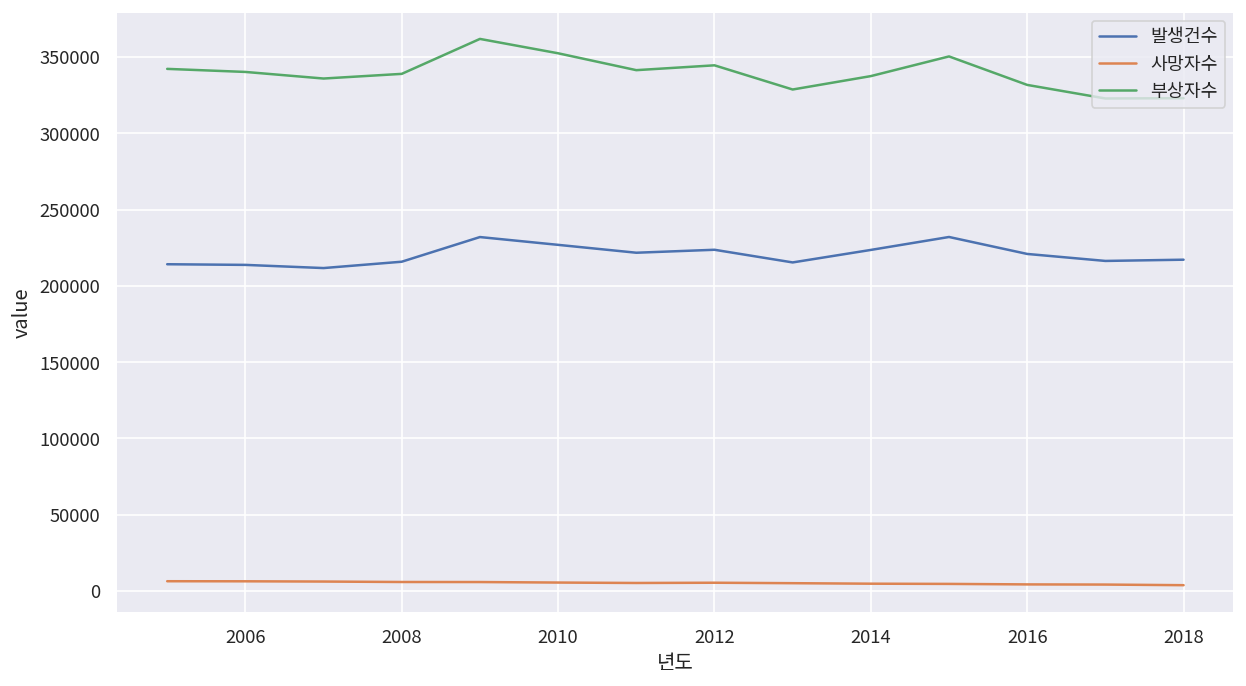

In [42]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(data=df2,x='년도',y='value',hue='구분')

# 3) 그래프 꾸미기
ax.grid(True)                # 배경 격자 표시/숨김
ax.legend(loc='upper right')

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.savefig('plot.png', dpi=my_dpi * 2)
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료
